# Family and Children's Services Crisis Project by DataCampers
### Objective 2: Analyze trends in call content by looking for which issues are most frequent and what is the average count of issues per call.
- *For the second objective, the columns that contain the information about the documented issues are those that begin with CRISIS Issues. When calls come in, call takers use a form to indicate the various issues the individual is experiencing.*
- *If an individual is experiencing multiple issues, the issues can be grouped together into a single cell, which makes understanding individual issues difficult. For this project you will parse the data from the different CRISIS Issues columns to allow deeper investigation of each individual issue.*

## Self EDA

#### Read in the relevant data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests as re

In [2]:
df1 = pd.read_excel('../data/NSSCrisisv_1.xlsx') # 2020-2021
df2 = pd.read_excel('../data/NSSCrisisv_2.xlsx') # 2022
# df_2020 = pd.read_excel('../data/2020callcenter.xlsx')
# df_2021 = pd.read_excel('../data/2021callcenter.xlsx')
# df_2022 = pd.read_excel('../data/2022callcenter.xlsx')

In [15]:
# Rob: Change name of CRISIS Subjective in v2 to CRISIS Issues to match v1
labels = list()
for col in df2.columns:
    labels.append(col.replace('Subjective', 'Issues'))
df2.columns = labels

In [16]:
# Rob: Drops columns that contain only NaN
df1.dropna(how='all', axis=1, inplace=True)
df2.dropna(how='all', axis=1, inplace=True)

In [ ]:
# Rob: Drop columns whose entire values are 98% NaN
# pct_null = df1.isnull().sum() / len(df1)
# missing_features = pct_null[pct_null > 0.98].index
# df1.drop(missing_features, axis=1, inplace=True)

In [ ]:
# pct_null = df1.isnull().sum() / len(df1)
# missing_features = pct_null[pct_null > 0.98].index
# df2.drop(missing_features, axis=1, inplace=True)

In [ ]:
# Maggie: Find the columns that are the same in both dfs
samecolumnsdf = pd.DataFrame(df1.columns.intersection(df2.columns))
samecolumnsdf

## Group EDA
We are using these columns in addition to the CRISIS Issues columns:
- CallReportNum, CallDateAndTimeStart, CallDateAndTimeEnd, CallLength, CallerNum

In [25]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col1 = [col for col in df1 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df1_ci = df1[filter_col1]

In [26]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col2 = [col for col in df2 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df2_ci = df2[filter_col2]

### THIS IS THE MASTER DATAFRAME

In [ ]:
all_ci = pd.concat([df1_ci, df2_ci])
all_ci

Refresher: ..... **what is the average count of issues per call.**

Example CRISIS column cell: A/B; C; D
- There are 4 issues within that cell
- Each issue can be separated by a / or ;
- Therefore count of issues should be count of ('/|;')+1 for cells that have ('/|;')

## ROB'S CODE TO COUNT ISSUES (Abusive Behavior)
- This is actually really informative, append a bunch of columns with the issue count of that row/category to the end of the DataFrame and calculate the average of that?

In [64]:
ab = all_ci['CRISIS Issues - Abusive Behavior'].notnull()

In [65]:
ab = all_ci[ab]

In [67]:
count = []

for x in ab['CRISIS Issues - Abusive Behavior']:
    counter0 = x.count(";")+1
    counter = counter0
    count.append(counter)

In [ ]:
ab['AB_Issues_Count'] = count

In [69]:
sum_ab = ab['AB_Issues_Count'].sum()
sum_ab

3656

## MY CODE TO COUNT ISSUES (Abusive Behavior) = SAME AS ROB'S!!!

In [70]:
# Total number of abusive behavior issues
ab = all_ci['CRISIS Issues - Abusive Behavior'].str.count(';')+1
ab.sum()

3656.0

In [76]:
sum_mh = mh['MH_Issues_Count'].sum()
sum_mh

41546

## Below are the total number of issues per CRISIS column (13)

In [94]:
# Total number of abusive behavior issues
ab = all_ci['CRISIS Issues - Abusive Behavior'].str.count(';')+1
total_ab = ab.sum()
total_ab

3656.0

In [95]:
# Total number of emotional state issues
es = all_ci['CRISIS Issues - Emotional State'].str.count(';')+1
total_es = es.sum()
total_es

98606.0

In [96]:
# Total number of Financial/Basic Needs issues
fbn = all_ci['CRISIS Issues - Financial/Basic Needs'].str.count(';')+1
total_fbn = fbn.sum()
total_fbn

3523.0

In [97]:
# Total number of Health/Physical issues
hp = all_ci['CRISIS Issues - Health/Physical'].str.count(';')+1
total_hp = hp.sum()
total_hp

7594.0

In [98]:
# Total number of Health/Physical issues
hom = all_ci['CRISIS Issues - Homicide'].str.count(';')+1
total_hom = hom.sum()
total_hom

72.0

In [99]:
# Total number of Information or Services Needed issues
isn = all_ci['CRISIS Issues - Information or Services Needed'].str.count(';')+1
total_isn = isn.sum()
total_isn

2541.0

In [100]:
# Total number of mental health issues
mh = all_ci['CRISIS Issues - Mental Health'].str.count(';')+1
total_mh = mh.sum()
total_mh

41546.0

In [101]:
# Total number of No Issue Call issues
nic = all_ci['CRISIS Issues - No Issue Call'].str.count(';')+1
total_nic = nic.sum()
total_nic

1521.0

In [102]:
# Total number of Other Description issues
od = all_ci['CRISIS Issues - Other Description'].str.count(';')+1
total_od = od.sum()
total_od

3477.0

In [103]:
# Total number of Relationships issues
rel = all_ci['CRISIS Issues - Relationships'].str.count(';')+1
total_rel = rel.sum()
total_rel

61546.0

In [104]:
# Total number of Substances issues
sub = all_ci['CRISIS Issues - Substances'].str.count(';')+1
total_sub = sub.sum()
total_sub

3901.0

In [105]:
# Total number of Suicide issues
sui = all_ci['CRISIS Issues - Suicide'].str.count(';')+1
total_sui = sui.sum()
total_sui

6514.0

In [109]:
# Total number of No presenting problems issues
npp = all_ci['CRISIS Issues - No presenting problems'].str.count(';')+1
total_npp = npp.sum()
total_npp

234.0

In [131]:
# Making the DataFrame
num_issues_list = [total_ab, total_es, total_fbn, total_hp, total_hom, total_isn, total_mh, total_nic, total_od, total_rel, total_sub, total_sui, total_npp]
cri_issues_list = ['Abusive Behavior', 'Emotional State', 'Financial/Basic Needs', 'Health/Physical', 'Homicide', 'Info/Service Needed', 'Mental Health', 'No Issue', 'Other', 'Relationships', 'Substances', 'Suicide', 'No Presenting Problems']
issue_count_df = pd.DataFrame(list(zip(cri_issues_list, num_issues_list)),
    columns =['CRISIS_Issue', 'Number_of_Issues'])
issue_count_df

,CRISIS_Issue,Number_of_Issues
0,Abusive Behavior,3656.0
1,Emotional State,98606.0
2,Financial/Basic Needs,3523.0
3,Health/Physical,7594.0
4,Homicide,72.0
5,Info/Service Needed,2541.0
6,Mental Health,41546.0
7,No Issue,1521.0
8,Other,3477.0
9,Relationships,61546.0


In [132]:
issue_count_df = issue_count_df.sort_values('Number_of_Issues', ascending=True)
issue_count_df

,CRISIS_Issue,Number_of_Issues
4,Homicide,72.0
12,No Presenting Problems,234.0
7,No Issue,1521.0
5,Info/Service Needed,2541.0
8,Other,3477.0
2,Financial/Basic Needs,3523.0
0,Abusive Behavior,3656.0
10,Substances,3901.0
11,Suicide,6514.0
3,Health/Physical,7594.0


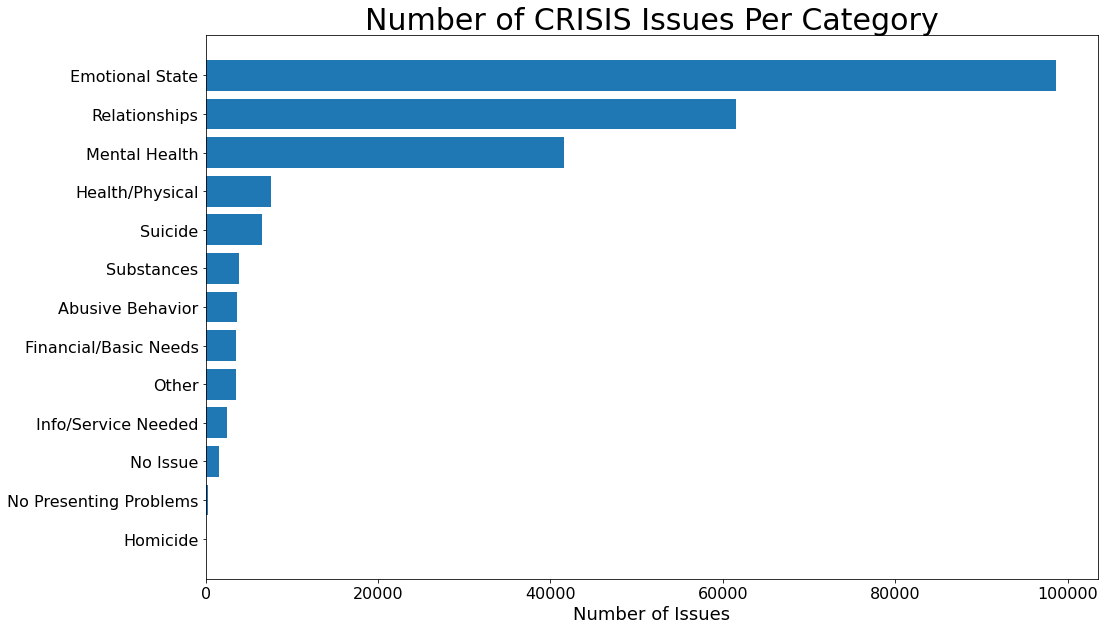

In [146]:
plt.figure(figsize=(16, 10))
plt.barh(issue_count_df.CRISIS_Issue, issue_count_df.Number_of_Issues)
plt.xticks(rotation = 0, fontsize=16)
plt.xlabel('Number of Issues', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Number of CRISIS Issues Per Category', fontsize=30);

There are different kinds of issues within each CRISIS category (Y-axis) -- this plot shows the count of all those issues.

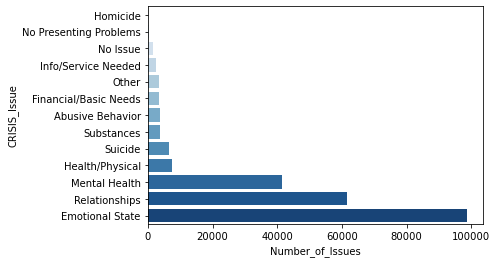

In [149]:
# Redoing above plot in seaborn, I'll play around with this on my own time
sns.barplot(x = issue_count_df.Number_of_Issues,
            y = issue_count_df.CRISIS_Issue,
            data = issue_count_df,
            palette = "Blues");
# Lol it's flipped

In [ ]:
# Rob: Use Seaborn to get column values
# ax.bar_label(ax.containers[0], fmt = '%d', 
#              padding=2, 
#               label_type='edge', 
#               color='black', 
#               fontweight='bold'
#             )

## Moving forward, I'll start using Rob's code to append issue counts per row to the master DataFrame. Then the average count of issues per call can be calculated from the overall total and (perhaps more insightfully) from each issue category.